In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

WT
kcat=0.15 1/s
Km=186.69μM
kcat/Km=7.97e-04
Caged
kcat=0.023 1/s
Km=84.80μM
kcat/Km=2.68e-04


<Figure size 432x288 with 0 Axes>

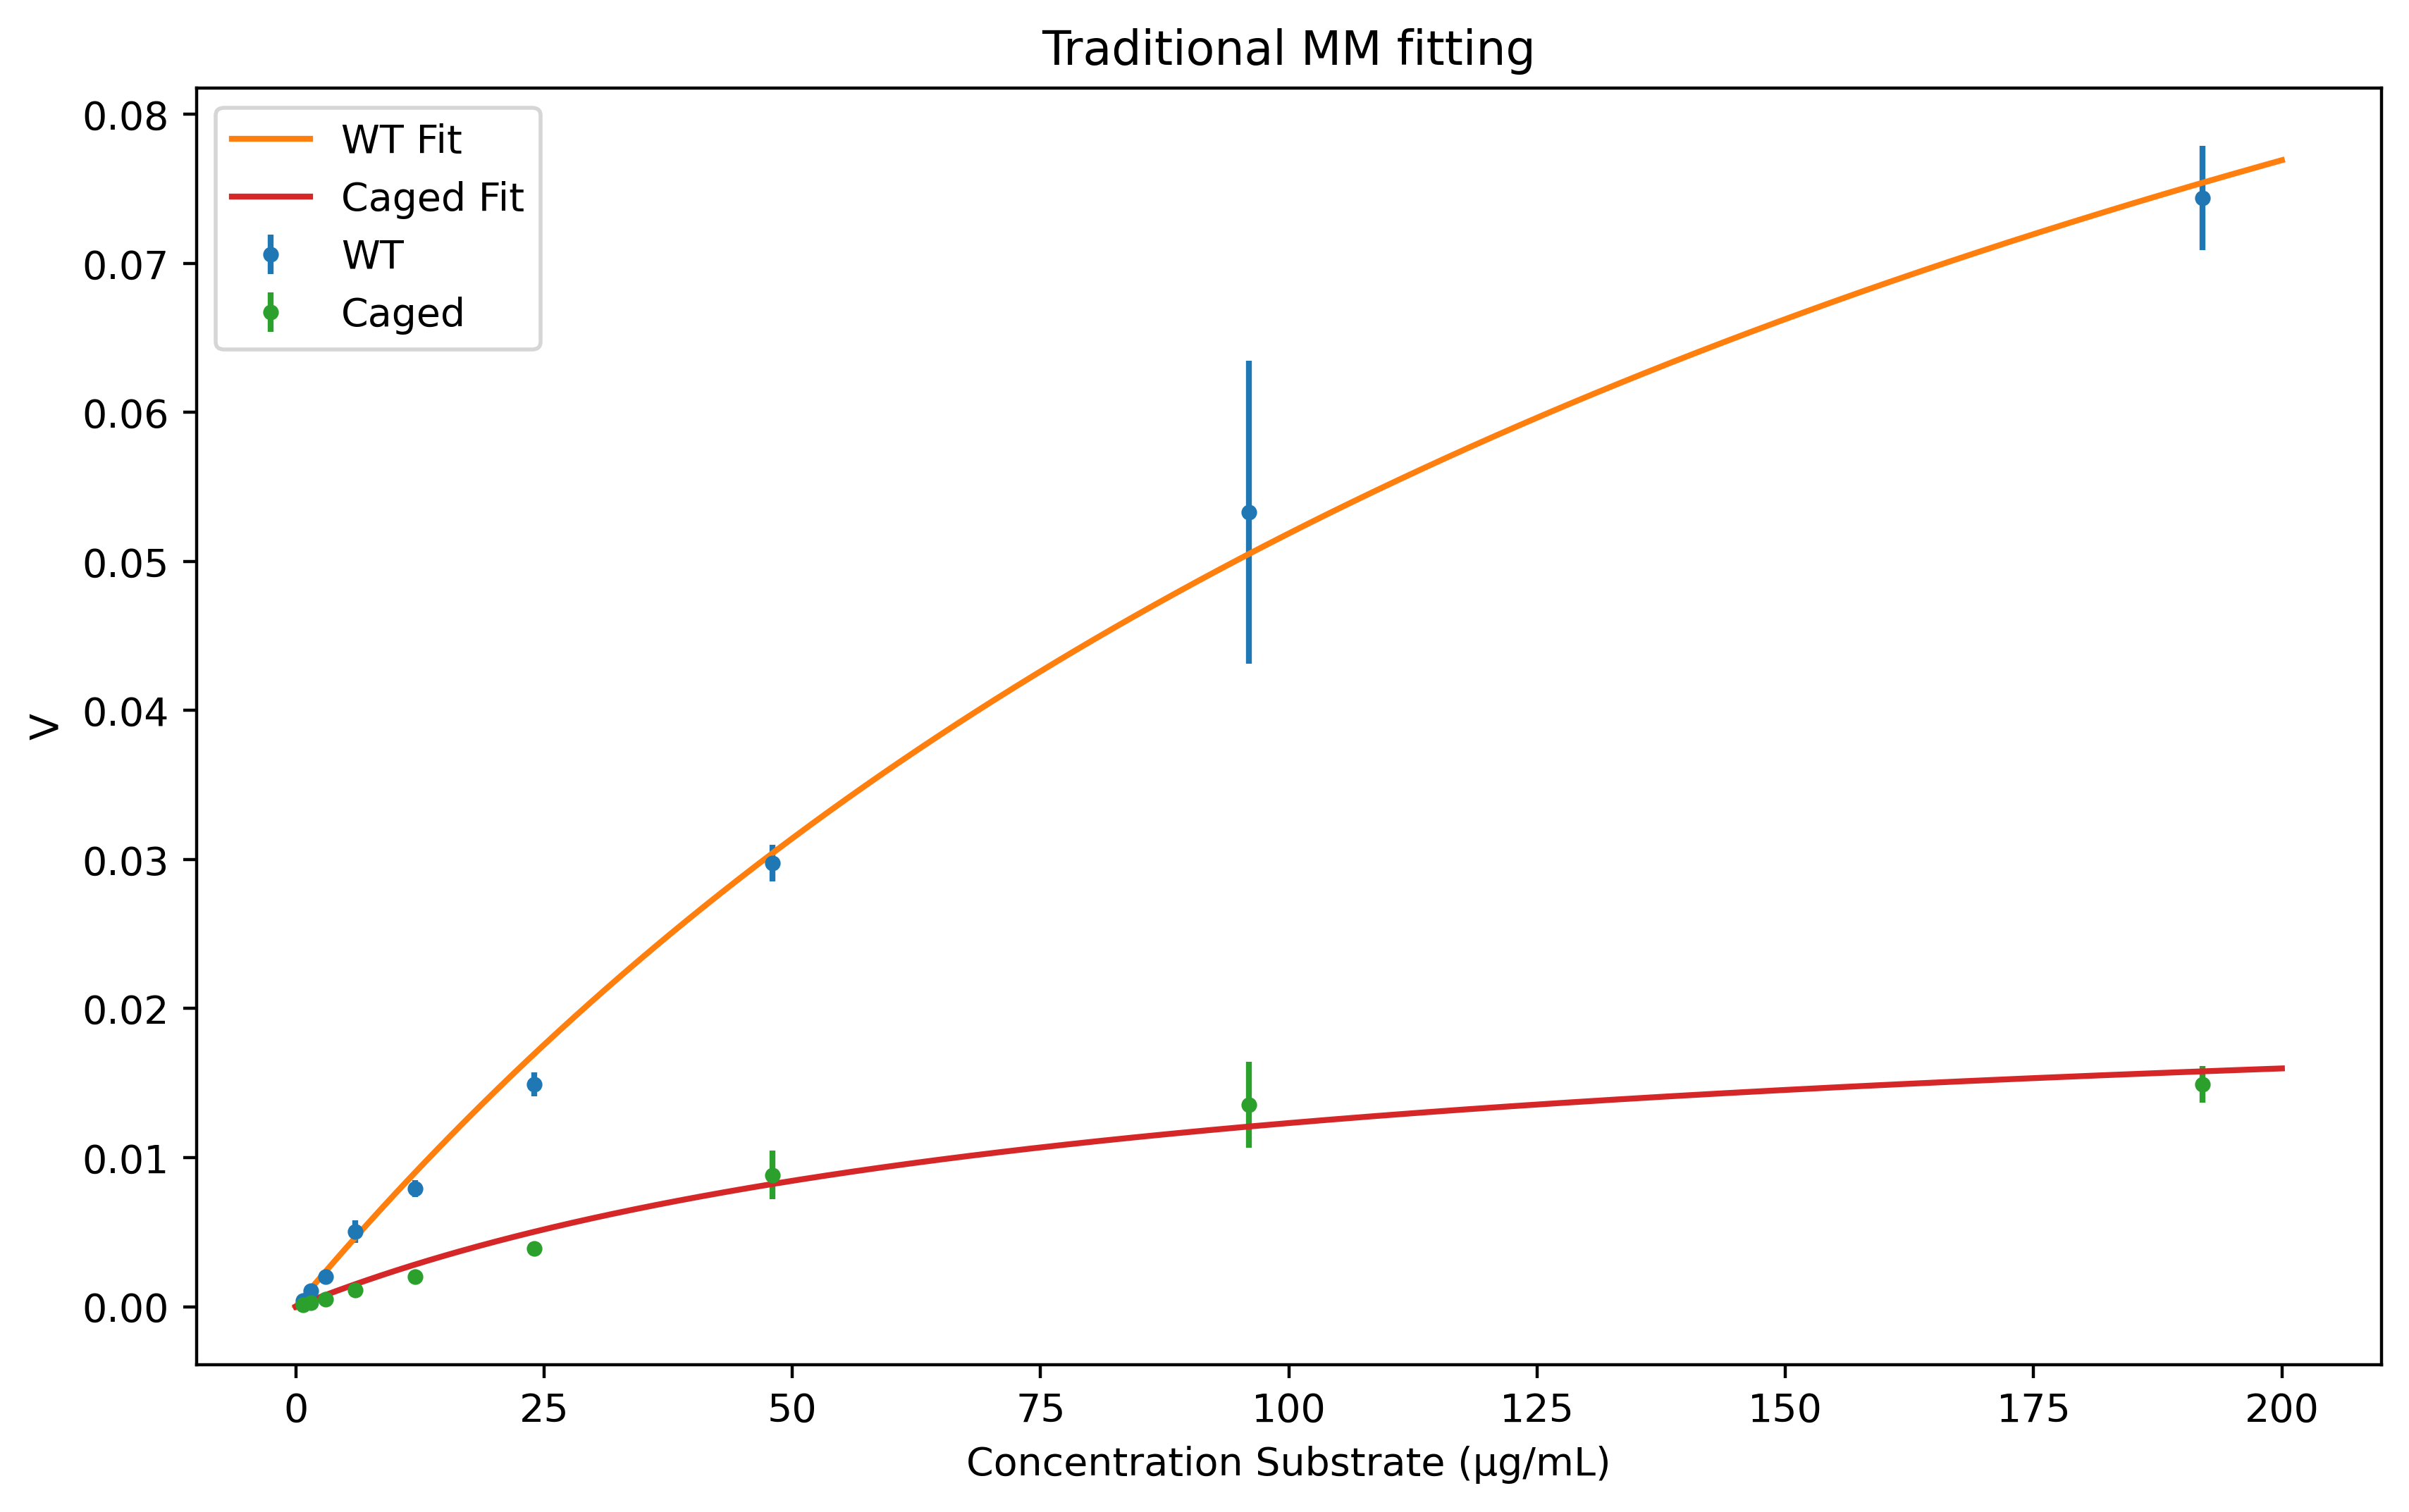

kcat ratio (Caged/WT): 0.15


In [2]:
#Traditional MM analysis on the data

#Obtain the data from excel spreadsheet
file= 'Lysozyme_WT_caged_MM_dataset.xlsx'

sheetMM = pd.read_excel(file, sheet_name='Averages')
DataMM=sheetMM[['Concentration', 'WT', 'WT-STD', 'Caged', 'Caged-STD']]

#Selecting data and converting to numpy arrays
conc=DataMM.iloc[:, 0]
conc=conc.to_numpy(dtype=float)

WTVint=DataMM.iloc[:, 1]
WTVint=WTVint.to_numpy(dtype=float)

WTstd=DataMM.iloc[:, 2]
WTstd=WTstd.to_numpy(dtype=float)

CVint=DataMM.iloc[:, 3]
CVint=CVint.to_numpy(dtype=float)

Cstd=DataMM.iloc[:, 4]
Cstd=Cstd.to_numpy(dtype=float)
#print(conc)

def Trad_MM(S, Km, kcat):
    """
    Function for the traditional MM analysis with dPdt vs S
    Inputs: 
        S: 1D numpy array of substrate concentrations
        Km: Float
        kcat: Float
        
    Output: 1D numpy array of initial rates
    
    """
    V=kcat*E0*S/(Km+S)
    return V

#Specifiy initial enzyme concentration
E0=1 #in micromolar
cpoints=np.linspace(0, 200, 1000)

# Fit inital rate data for WT (W) and Caged (C) to Trad_MM function
fitW, covarW = curve_fit (Trad_MM, conc, WTVint, p0=[.5, 1], bounds=([0, 0], [5000, 5000]), maxfev=5000)
fitC, covarC = curve_fit (Trad_MM, conc, CVint, p0=[.5, 1], bounds=([0, 0], [5000, 5000]), maxfev=5000)

# Calculate error at the 95% confidence interval
perrW = np.sqrt(np.diag(covarW))*1.96 #For 95% confidence interval
perrC = np.sqrt(np.diag(covarC))*1.96

print("WT")
print ("kcat=" + str('%.2f' %fitW[1]) + ' 1/s') #kcat in 1/s
print ("Km=" +str('%.2f' %fitW[0]) + '\u03BCM') #Km is in ug/mL
print ("kcat/Km=" +str('%.2e' %(fitW[1]/fitW[0]))) #mL/ug/s

print("Caged")
print ("kcat=" + str('%.3f' %fitC[1]) + ' 1/s') #kcat in 1/s
print ("Km=" +str('%.2f' %fitC[0]) + '\u03BCM') #Km is in ug/mL
print ("kcat/Km=" +str('%.2e' %(fitC[1]/fitC[0]))) #mL/ug/s

#Now let's plot these:
plt.figure(0)
plt.figure(figsize=(10,6), dpi=400)
plt.errorbar(conc, WTVint, label='WT', marker='.', ls='', yerr=WTstd*1.96/2) #Put error at 95% CI where n=4
plt.plot(cpoints, Trad_MM(cpoints, fitW[0], fitW[1]), label='WT Fit')
plt.errorbar(conc, CVint, label='Caged', marker='.', ls='', yerr=Cstd*1.96)  #Put error at 95% CI where n=4
plt.plot(cpoints, Trad_MM(cpoints, fitC[0], fitC[1]), label='Caged Fit')
plt.xlabel('Concentration Substrate (\u03BCg/mL)')
plt.ylabel('V')
plt.title('Traditional MM fitting')
plt.legend()
plt.show()

print("kcat ratio (Caged/WT): "+str('%.2f' %(fitC[1]/fitW[1])))


#Note 95% CI calculated by CI95=Z*STD/sqrt(n), where Z is 1.96 for the 95% CI, STD is the standard deviation, and n is 
#the number of observations


WT
kcat=0.15± 0.01/s
Km=187± 54μg/mL
kcat/Km=7.97e-04
Caged
kcat=0.023± 0.003 1/s
Km=85± 23μg/mL
kcat/Km=2.68e-04


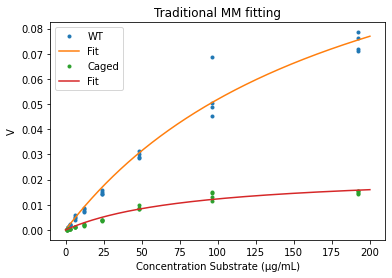

kcat ratio (Caged/WT): 0.15


In [15]:
#Traditional MM analysis on the data for better error using individual points instead of averages

#Obtain the data from excel spreadsheet, except for the Full sheet
sheetMM = pd.read_excel(file, sheet_name='Full')
DataMM=sheetMM[['Concentration', 'WT', 'Caged']]

#Selecting data
conc=DataMM.iloc[:, 0]
conc=conc.to_numpy(dtype=float)
WTVint=DataMM.iloc[:, 1]
WTVint=WTVint.to_numpy(dtype=float)
CVint=DataMM.iloc[:, 2]
CVint=CVint.to_numpy(dtype=float)
#print(conc)

def Trad_MM(S, Km, kcat):
    """
    Function for the traditional MM analysis with dPdt vs S
    
    """
    V=kcat*E0*S/(Km+S)
    return V


fitW, covarW = curve_fit (Trad_MM, conc, WTVint, p0=[.5, 1], bounds=([0, 0], [5000, 5000]), maxfev=5000)
fitC, covarC = curve_fit (Trad_MM, conc, CVint, p0=[.5, 1], bounds=([0, 0], [5000, 5000]), maxfev=5000)

perrW = np.sqrt(np.diag(covarW))*1.96 #For 95% confidence interval, this is taken over all the observations so we'll just adjust with the Z value for 95% CI
perrC = np.sqrt(np.diag(covarC))*1.96

print("WT")
print ("kcat=" + str('%.2f' %fitW[1]) + '\u00B1 '+str('%.1f' %perrW[1]) + '1/s')
print ("Km=" +str('%.0f' %fitW[0]) + '\u00B1 '+str('%.0f' %perrW[0]) +'\u03BCg/mL')
print ("kcat/Km=" +str('%.2e' %(fitW[1]/fitW[0])))

print("Caged")
print ("kcat=" + str('%.3f' %fitC[1]) +'\u00B1 '+str('%.3f' %perrC[1]) + ' 1/s')
print ("Km=" +str('%.0f' %fitC[0]) +'\u00B1 '+ str('%.0f' %perrC[0])+'\u03BCg/mL')
print ("kcat/Km=" +str('%.2e' %(fitC[1]/fitC[0])))

#Now let's plot these:
plt.figure(0)
plt.plot(conc, WTVint, label='WT', marker='.', ls='')
plt.plot(cpoints, Trad_MM(cpoints, fitW[0], fitW[1]), label='Fit')
plt.plot(conc, CVint, label='Caged', marker='.', ls='')
plt.plot(cpoints, Trad_MM(cpoints, fitC[0], fitC[1]), label='Fit')
#plt.errorbar(conc, Vint, yerr=std, label='both limits (default)')
plt.xlabel('Concentration Substrate (\u03BCg/mL)')
plt.ylabel('V')
plt.title('Traditional MM fitting')
plt.legend()
plt.show()

print("kcat ratio (Caged/WT): "+str('%.2f' %(fitC[1]/fitW[1])))